# Accessing the data

I want to access the package and use it to run some analysis of Lionel Messi's performances in La Liga.

In [1]:
library(StatsBombR)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: stringi
Loading required package: stringr
Loading required package: tibble
Loading required package: rvest
Loading required package: xml2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Loading required package: RCurl
Loading required package: bitops
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: httr
Loading required package: jsonlite
Loading required package: purrr

Attaching package: 'purrr'

The following object is masked from 'package:jsonlite':

    flatten

The following objects are masked from 'package:foreach':

    accumulate, when

The following object is mas

### Competition data

In [5]:
comp <- FreeCompetitions()
comp

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
37,42,England,FA Women's Super League,female,2019/2020,2019-09-04T11:59:55.116579,NA
37,4,England,FA Women's Super League,female,2018/2019,2019-06-23T15:32:29.914,2019-06-23T15:32:29.914
43,3,International,FIFA World Cup,male,2018,2019-06-23T12:38:35.142,2019-06-23T12:38:35.142
11,27,Spain,La Liga,male,2015/2016,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861
11,26,Spain,La Liga,male,2014/2015,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563
11,25,Spain,La Liga,male,2013/2014,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866
11,24,Spain,La Liga,male,2012/2013,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935
11,23,Spain,La Liga,male,2011/2012,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842
11,22,Spain,La Liga,male,2010/2011,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870
11,21,Spain,La Liga,male,2009/2010,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533


Now filter out any other competitions

In [6]:
comp <- comp[comp$competition_id == 11, ]
comp

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
4,11,27,Spain,La Liga,male,2015/2016,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861
5,11,26,Spain,La Liga,male,2014/2015,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563
6,11,25,Spain,La Liga,male,2013/2014,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866
7,11,24,Spain,La Liga,male,2012/2013,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935
8,11,23,Spain,La Liga,male,2011/2012,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842
9,11,22,Spain,La Liga,male,2010/2011,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870
10,11,21,Spain,La Liga,male,2009/2010,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533
11,11,41,Spain,La Liga,male,2008/2009,2019-07-06T22:42:14.468,2019-07-06T22:42:14.468
12,11,40,Spain,La Liga,male,2007/2008,2019-07-04T10:05:48.149,2019-07-04T10:05:48.149
13,11,39,Spain,La Liga,male,2006/2007,2019-07-02T12:37:13.627,2019-07-02T12:37:13.627


### Match data

Let's have a look at the match data next

In [13]:
matches <- FreeMatches(comp)
options(repr.matrix.max.rows=60, repr.matrix.max.cols=40)
nrow(matches)
head(matches, n=5)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


[1] 348

match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.managers,home_team.country.id,home_team.country.name,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.managers,away_team.country.id,away_team.country.name,metadata.data_version,metadata.shot_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
266310,2016-04-20,20:00:00.000,0,8,available,2019-07-24T16:57:09.139,34,11,Spain,La Liga,27,2015/2016,219,Deportivo La Coruna,male,NA,NULL,214,Spain,217,Barcelona,male,NA,NULL,214,Spain,1.1.0,2,1,Regular Season,4658,Estadio Abanca-Riazor,NA,NA,215,Ricardo De Burgos,112,Italy
266498,2016-03-12,16:00:00.000,6,0,available,2019-07-24T15:24:14.040,29,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,216,Getafe,male,NA,"509 , Francisco Escriba Segura, Fran EscribÃ¡ , 1965-05-03 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,1015,Pedro PÃ©rez,NA,NA
265839,2016-02-28,20:30:00.000,2,1,available,2019-07-22T14:03:27.572,26,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,213,Sevilla,male,NA,"21 , Unai Emery Etxegoien, Unai Emery , 1971-11-03 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,217,Santiago Jaime,112,Italy
265958,2016-05-08,17:00:00.000,5,0,available,2019-07-21T23:53:01.973,37,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,214,Espanyol,male,NA,"1816 , Constantin GÃ¢lcÄƒ, NA , 1972-03-08 , 187 , Romania",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,183,JesÃºs Gil,214,Spain
266106,2016-03-20,16:00:00.000,2,2,available,2019-07-20T09:50:35.712,30,11,Spain,La Liga,27,2015/2016,222,Villarreal,male,NA,"211 , Marcelino GarcÃ­a Toral, NA , 1965-08-14 , 214 , Spain",214,Spain,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,361,Estadio de la CerÃ¡mica,214,Spain,220,JosÃ© SÃ¡nchez,112,Italy


What's the distribution of goals in these matches

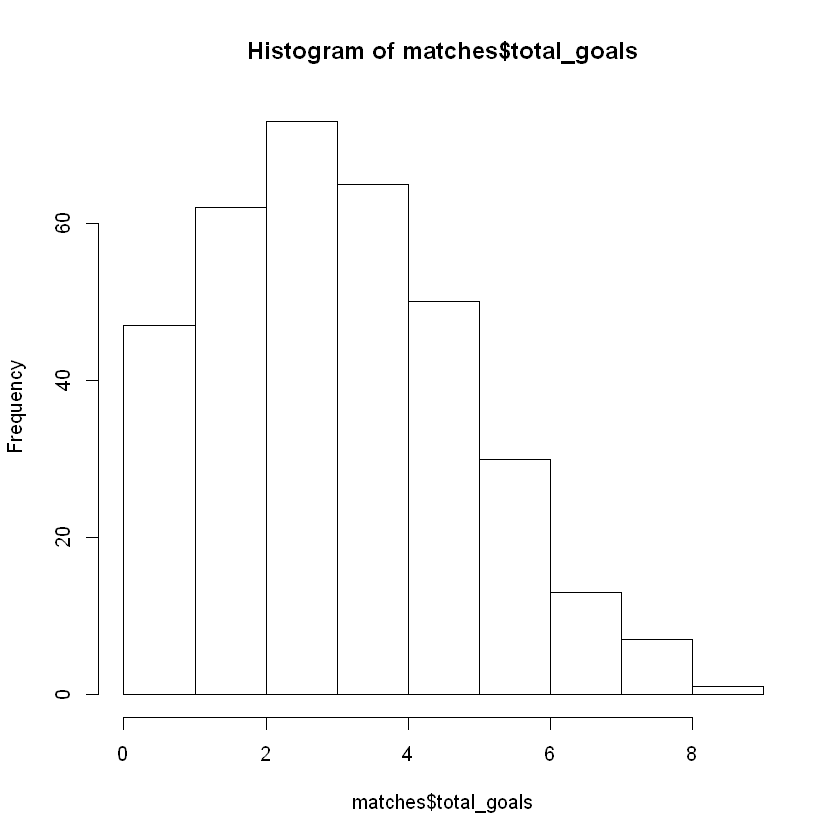

In [9]:
matches["total_goals"] <- matches$home_score + matches$away_score
hist(matches$total_goals, n=10)

When do matches kickoff

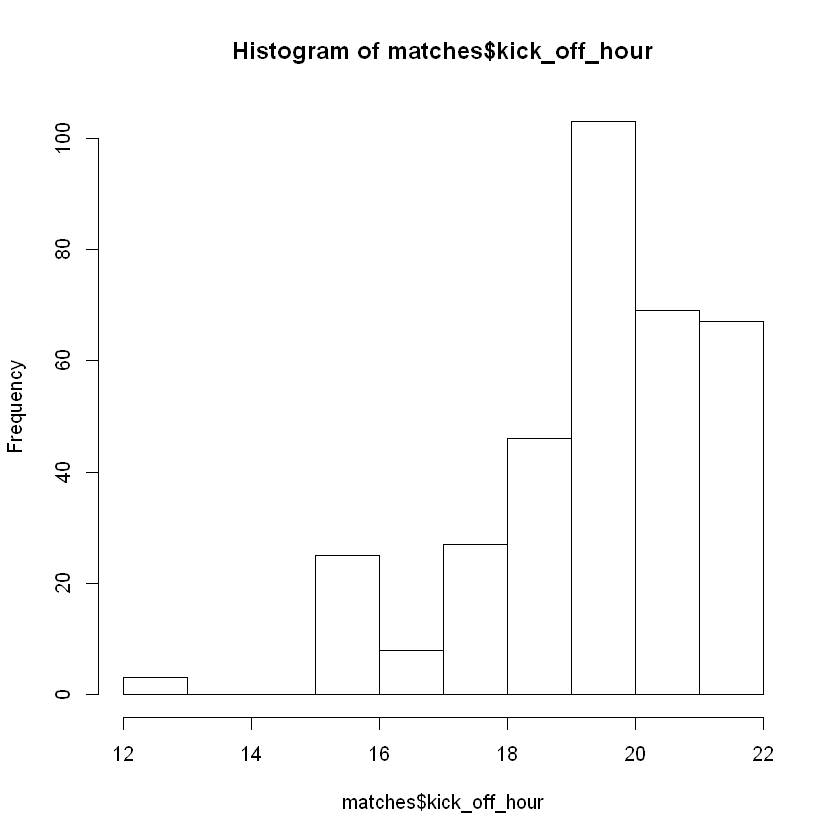

In [10]:
library(stringr)
matches["kick_off_hour"] <- as.numeric(stringr::str_sub(matches$kick_off, start = 1, end = 2))
hist(matches$kick_off_hour, breaks=10)

### Lineup data

What about team lineups

In [11]:
lineups <- StatsBombFreeLineups(matches)
head(lineups, n=5)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Warning message in if (MatchesDF == "ALL") {:
"the condition has length > 1 and only the first element will be used"

team_id,team_name,lineup,match_id,competition_id,season_id
217,Barcelona,"4320 , 4324 , 4691 , 5203 , 5211 , 5216 , 5246 , 5470 , 5503 , 5506 , 6379 , 6998 , 7068 , 22102 , Neymar da Silva Santos Junior , Daniel Alves da Silva , Claudio Andrés Bravo Muñoz , Sergio Busquets i Burgos , Jordi Alba Ramos , Andrés Iniesta Luján , Luis Alberto Suárez Díaz , Ivan Rakitic , Lionel Andrés Messi Cuccittini, Javier Alejandro Mascherano , Sergi Roberto Carnicer , Rafael Alcântara do Nascimento, Marc Bartra Aregall , Adriano Correia Claro , Neymar , Dani Alves , Claudio Bravo , Sergio Busquets , Jordi Alba , Andrés Iniesta , Luis Suárez , NA , Lionel Messi , Javier Mascherano , Sergi Roberto , Rafinha , Marc Bartra , Adriano , 11 , 6 , 13 , 16 , 18 , 8 , 9 , 4 , 10 , 14 , 24 , 12 , 15 , 21 , 31 , 31 , 45 , 214 , 214 , 214 , 242 , 56 , 11 , 11 , 214 , 31 , 214 , 31 , Brazil , Brazil , Chile , Spain , Spain , Spain , Uruguay , Croatia , Argentina , Argentina , Spain , Brazil , Spain , Brazil",266310,11,27
219,Deportivo La Coruna,"5582 , 5724 , 6728 , 6732 , 6733 , 6738 , 6777 , 6913 , 23800 , 23806 , 25921 , 25997 , 27243 , 27457 , Celso Borges Mora , Fayçal Fajr , Federico Nicolás Cartabia , Lucas Pérez Martínez , Pedro Mosquera Parada , Juan Francisco Moreno Fuertes, Sidnei Rechel da Silva Júnior, Fernando Navarro i Corbacho , Laureano Sanabria Ruiz , Alejandro Bergantiños García , Rubén Gracia Calmache , Jonás Manuel Gutiérrez , Oriol Riera Magem , Manuel Fernández Muñíz , Celso Borges , NA , Federico Cartabia , Lucas Pérez , Pedro Mosquera , Juanfran , Sidnei , Fernando Navarro , Laure , Álex Bergantiños , Cani , Jonás Gutiérrez , Oriol Riera , Manu Fernández , 22 , 19 , 17 , 7 , 5 , 11 , 12 , 3 , 15 , 4 , 6 , 24 , 9 , 25 , 54 , 154 , 11 , 214 , 214 , 214 , 31 , 214 , 214 , 214 , 214 , 11 , 214 , 214 , Costa Rica , Morocco , Argentina , Spain , Spain , Spain , Brazil , Spain , Spain , Spain , Spain , Argentina , Spain , Spain",266310,11,27
217,Barcelona,"4320 , 4691 , 5211 , 5213 , 5216 , 5503 , 6332 , 6379 , 6400 , 6616 , 7068 , 10609 , 11094 , 21229 , Neymar da Silva Santos Junior , Claudio Andrés Bravo Muñoz , Jordi Alba Ramos , Gerard Piqué Bernabéu , Andrés Iniesta Luján , Lionel Andrés Messi Cuccittini, Thomas Vermaelen , Sergi Roberto Carnicer , Aleix Vidal Parreu , Munir El Haddadi Mohamed , Marc Bartra Aregall , Jérémy Mathieu , Arda Turan , Sergi Samper Montaña , Neymar , Claudio Bravo , Jordi Alba , Gerard Piqué , Andrés Iniesta , Lionel Messi , NA , Sergi Roberto , Aleix Vidal , Munir El Haddadi , Marc Bartra , NA , NA , Sergi Samper , 11 , 13 , 18 , 3 , 8 , 10 , 23 , 20 , 22 , 17 , 15 , 24 , 7 , 26 , 31 , 45 , 214 , 214 , 214 , 11 , 22 , 214 , 214 , 214 , 214 , 78 , 233 , 214 , Brazil , Chile , Spain , Spain , Spain , Argentina , Belgium , Spain , Spain , Spain , Spain , France , Turkey , Spain",266498,11,27
216,Getafe,"6625 , 6736 , 6907 , 11675 , 11813 , 15893 , 16426 , 17054 , 23416 , 25881 , 27092 , 27401 , 27402 , 27403 , Vicente Guaita Panadero , Álvaro Medrán Just , Pedro León Sánchez Gil , Moisés Gómez Bordonado , Emiliano Buendía , Víctor Rodríguez Romero , Wanderson Maciel Sousa Campos , Emiliano Daniel Velázquez Maldonado, Stefan Šcepovic , Juan Antonio Rodríguez Villamuela , Abdoul Karim Yoda , Bernard Mensah , Álvaro Daniel Pereira Barragán , Santiago Vergini , Vicente Guaita , Álvaro Medrán , Pedro León , Moi Gómez , NA , Víctor Rodríguez , Wamberto , Emiliano Velázquez , NA , Juan Rodríguez , NA , NA , NA , NA , 13 , 23 , 14 , 21 , 32 , 18 , 30 , 4 , 12 , 22 , 11 , 17 , 2 , 5 , 214 , 214 , 214 , 214 , 11 , 214 , 31 , 242 , 203 , 214 , 78 , 86 , 242 , 11 , Spain , Spain , Spain , Spain , Argentina , Spain , Brazil , Uruguay , Serbia , Spain , France , Ghana , Uruguay , Argentina",266498,11,27
213,Sevilla,"3253 , 3497 , 5737 , 6356 , 6401 , 6672 , 6823 , 6841 , 7154 , 8523 , 10476 , 23802 , 27483 , Adil Rami , Vicente Iborra De La Fuente , Steven N'Kemboanza Mike Christopher Nzonzi, Michael Krohn-Dehli , Kevin G

### Event data

Next is the biggie - getting all the event data for his matches

In [16]:
# events <- get.matchFree(matches[1,])
# events <- StatsBombFreeEvents(matches[1,])
events <- StatsBombFreeEvents(matches[matches$season.season_id == 27, ])
# events <- StatsBombFreeEvents(matches)
nrow(events)
ncol(events)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Warning message in if (MatchesDF == "ALL") {:
"the condition has length > 1 and only the first element will be used"

[1] 120973

[1] 145

In [17]:
events <- allclean(events)
nrow(events)
ncol(events)

Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = "id"
Joining, by = c("period", "match_id")


[1] 120973

[1] 181

In [19]:
options(repr.matrix.max.rows=100, repr.matrix.max.cols=200)
tail(head(events, n=100), n=5)

id,index,period,timestamp,minute,second,possession,duration,related_events,location,under_pressure,counterpress,out,off_camera,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,player.id,player.name,position.id,position.name,pass.length,pass.angle,pass.end_location,pass.aerial_won,pass.cross,pass.switch,pass.deflected,pass.assisted_shot_id,pass.shot_assist,pass.goal_assist,pass.inswinging,pass.outswinging,pass.through_ball,pass.no_touch,pass.cut_back,pass.recipient.id,pass.recipient.name,pass.height.id,pass.height.name,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,pass.outcome.id,pass.outcome.name,pass.technique.id,pass.technique.name,carry.end_location,ball_receipt.outcome.id,ball_receipt.outcome.name,duel.type.id,duel.type.name,duel.outcome.id,duel.outcome.name,clearance.right_foot,clearance.head,clearance.left_foot,clearance.aerial_won,clearance.body_part.id,clearance.body_part.name,interception.outcome.id,interception.outcome.name,foul_won.defensive,foul_won.advantage,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.first_time,shot.freeze_frame,shot.one_on_one,shot.open_goal,shot.outcome.id,shot.outcome.name,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.outcome.id,goalkeeper.outcome.name,dribble.nutmeg,dribble.overrun,dribble.no_touch,dribble.outcome.id,dribble.outcome.name,block.save_block,foul_committed.advantage,foul_committed.offensive,foul_committed.card.id,foul_committed.card.name,foul_committed.type.id,foul_committed.type.name,ball_recovery.recovery_failure,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,match_id,competition_id,season_id,pass.miscommunication,ball_recovery.offensive,foul_committed.penalty,foul_won.penalty,shot.saved_to_post,goalkeeper.shot_saved_to_post,50_50.outcome.id,50_50.outcome.name,block.deflection,miscontrol.aerial_won,shot.aerial_won,goalkeeper.success_in_play,clearance.other,block.offensive,bad_behaviour.card.id,bad_behaviour.card.name,shot.follows_dribble,shot.saved_off_target,shot.redirect,goalkeeper.shot_saved_off_target,pass.straight,shot.deflected,injury_stoppage.in_chain,goalkeeper.punched_out,goalkeeper.lost_in_play,goalkeeper.lost_out,half_end.early_video_end,location.x,location.y,carry.end_location.x,carry.end_location.y,pass.end_location.x,pass.end_location.y,shot.end_location.x,shot.end_location.y,shot.end_location.z,player.name.GK,player.id.GK,location.x.GK,location.y.GK,DistToGoal,DistToKeeper,AngleToGoal,AngleToKeeper,AngleDeviation,avevelocity,DistSGK,density,density.incone,distance.ToD1,distance.ToD2,AttackersBehindBall,DefendersBehindBall,DefendersInCone,InCone.GK,DefArea,distance.ToD1.360,distance.ToD2.360,milliseconds,ElapsedTime,StartOfPossession,TimeInPoss,TimeToPossEnd
65389a70-560b-45c1-90b9-22a8d6125e6a,96,1,00:01:40.439,1,40,5,0.849025,NULL,"38.5, 14.5",NA,NA,NA,NA,17,Pressure,213,Sevilla,4,From Throw In,213,Sevilla,NA,NULL,6356,Michael Krohn-Dehli,21,Left Wing,NA,NA,NULL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NULL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NULL,NA,NA,NULL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NULL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,265839,11,27,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,38.5,14.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,439,100.439,92.224,8.215,7.146
b421f2d6-8825-49a3-904b-8070e4e170ac,97,1,00:01:41.526,1,41,5,NA,c7a902bd-4b30-4a10-aefa-8791ee72b0b0,"80.4, 68.1",NA,NA,NA,NA,42,Ball Receipt*,213,Sevilla,4,From Throw 

For this analysis I'm just going to focus on shots so let's filter everthing else out

In [20]:
shots <- events[events$type.name == "Shot", ]
shots <- shots[,c("period", "timestamp", "minute", "play_pattern.name",
                      "position.name", "under_pressure",
                    "team.name", "player.name", "location", "shot.type.name", 
                      "shot.outcome.name", "shot.statsbomb_xg")]
head(shots, n=10)

period,timestamp,minute,play_pattern.name,position.name,under_pressure,team.name,player.name,location,shot.type.name,shot.outcome.name,shot.statsbomb_xg
1,00:04:09.871,4,Regular Play,Left Back,NA,Barcelona,Jordi Alba Ramos,"102.7, 19.9",Open Play,Blocked,0.01607180
1,00:05:43.109,5,From Corner,Right Back,NA,Sevilla,Jorge Andújar Moreno,"107.4, 40.7",Open Play,Blocked,0.01665879
1,00:07:26.564,7,From Corner,Left Center Back,TRUE,Sevilla,Timothée Kolodziejczak,"114.5, 38.1",Open Play,Off T,0.38359570
1,00:10:40.530,10,Regular Play,Right Wing,NA,Sevilla,Víctor Machín Pérez,"97.5, 44.8",Open Play,Saved,0.05968972
1,00:12:12.385,12,From Keeper,Center Forward,TRUE,Barcelona,Luis Alberto Suárez Díaz,"108.6, 52.9",Open Play,Saved,0.04843321
1,00:12:46.845,12,From Corner,Center Forward,NA,Barcelona,Luis Alberto Suárez Díaz,"103.4, 36.3",Open Play,Post,0.02881422
1,00:13:07.722,13,From Corner,Center Forward,NA,Barcelona,Luis Alberto Suárez Díaz,"103.0, 18.5",Open Play,Off T,0.01035347
1,00:19:17.780,19,From Throw In,Right Wing,NA,Sevilla,Víctor Machín Pérez,"112.8, 46.9",Open Play,Goal,0.28756160
1,00:30:46.164,30,From Free Kick,Right Wing,NA,Barcelona,Lionel Andrés Messi Cuccittini,"99.6, 29.6",Free Kick,Goal,0.10010701
1,00:33:43.283,33,Regular Play,Right Wing,NA,Sevilla,Víctor Machín Pérez,"97.9, 48.0",Open Play,Blocked,0.03019596


# Time series analysis

### xG by Minute

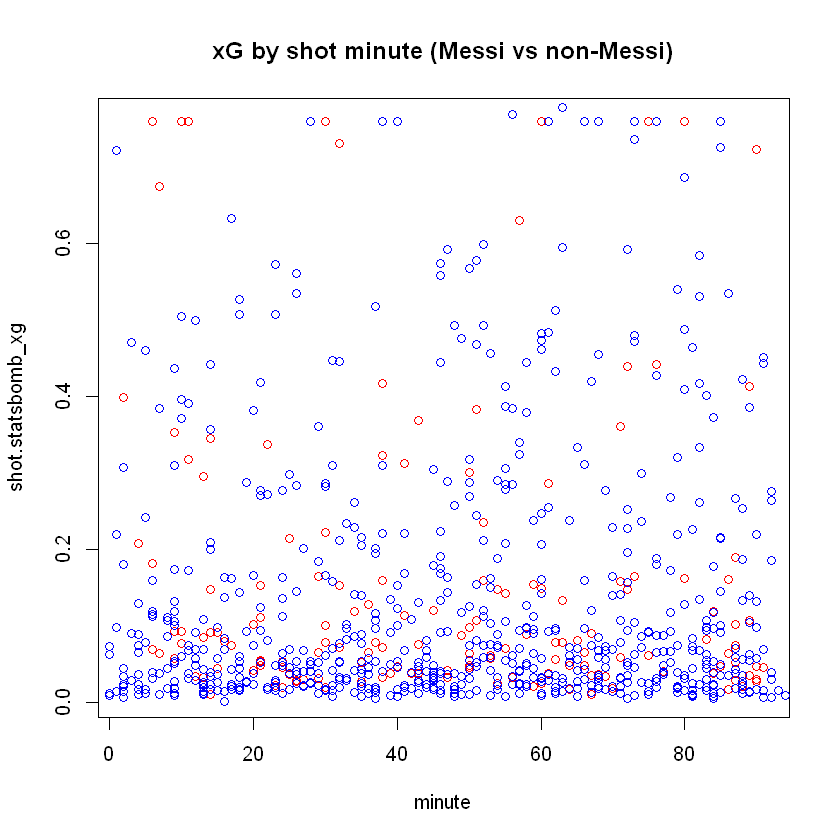

In [71]:
plot(shot.statsbomb_xg ~ minute, 
  data = shots[shots$player.name == 'Lionel Andrés Messi Cuccittini', ],
     col = "red",
     main = "xG by shot minute (Messi vs non-Messi)"
    )
points(shot.statsbomb_xg ~ minute, 
  data = shots[shots$player.name != 'Lionel Andrés Messi Cuccittini', ],
     col = "blue"
    )

# Ranking/part-to-whole analysis

In [72]:
library(lattice)

### xG by Outcome

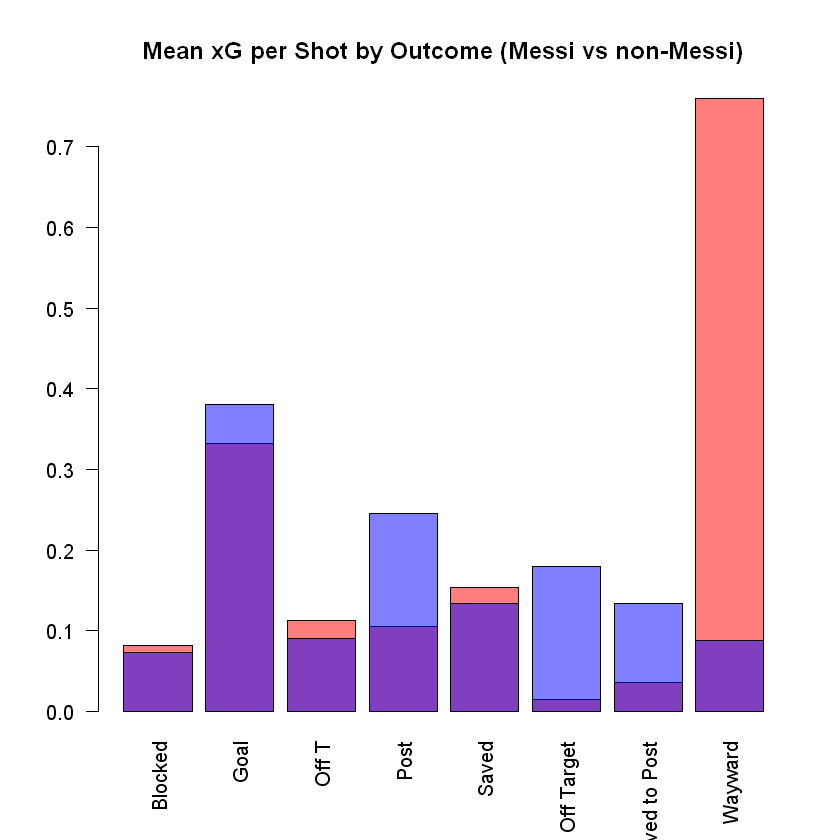

In [86]:
shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        main = "Mean xG per Shot by Outcome (Messi vs non-Messi)"
    )

shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        add = TRUE
    )

### xG by Shot type

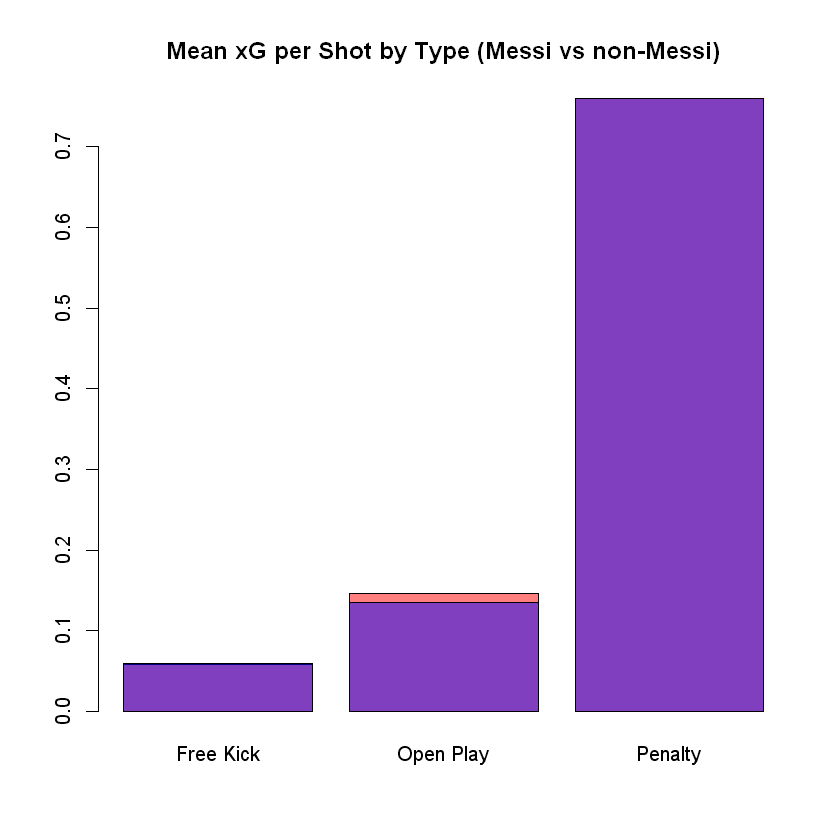

In [99]:
shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(1,0,0,.5),
#         las = 2,
        main = "Mean xG per Shot by Type (Messi vs non-Messi)"
    )

shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(0,0,1,.5),
#         las = 2,
        add = TRUE
    )

### xG by Play pattern

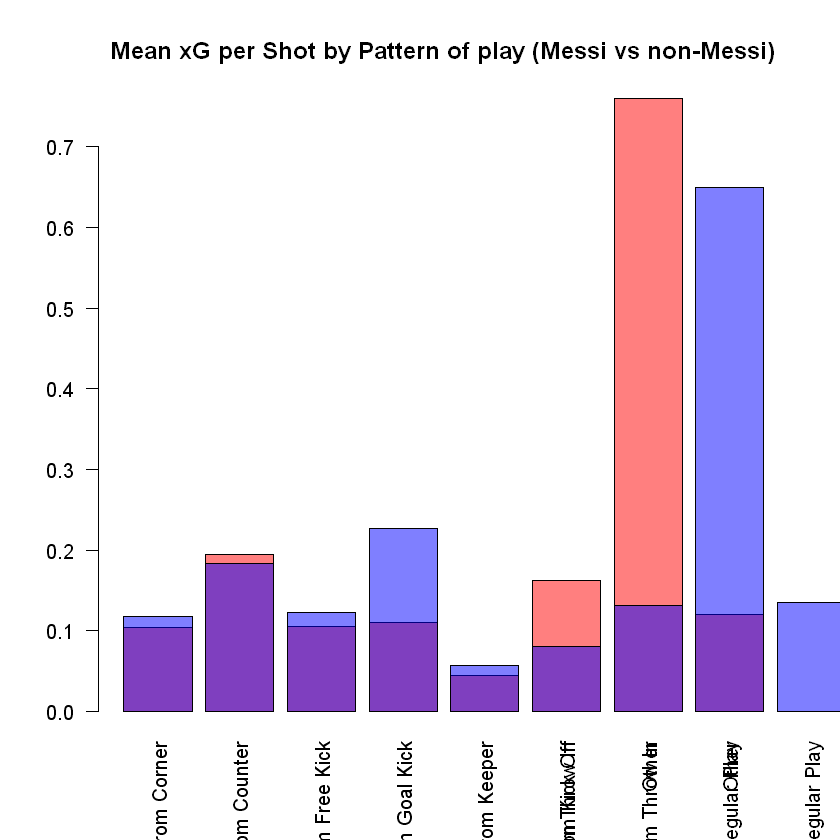

In [97]:
shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        main = "Mean xG per Shot by Pattern of play (Messi vs non-Messi)"
    )

shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        add = TRUE
    )

# Distribution analysis

### xG distribution

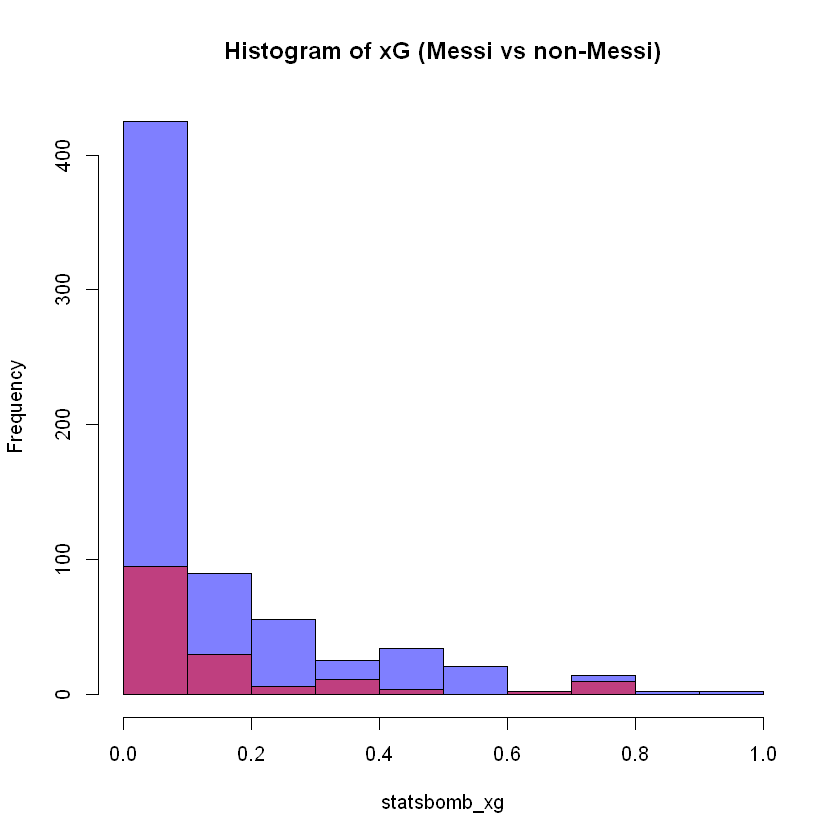

In [67]:
hist(shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'],
     col = rgb(0,0,1,.5),
     main = "Histogram of xG (Messi vs non-Messi)",
     xlab = "statsbomb_xg"
    )
hist(shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'],
    col = rgb(1,0,0,.5), 
     add = TRUE)

### Shot time distribution

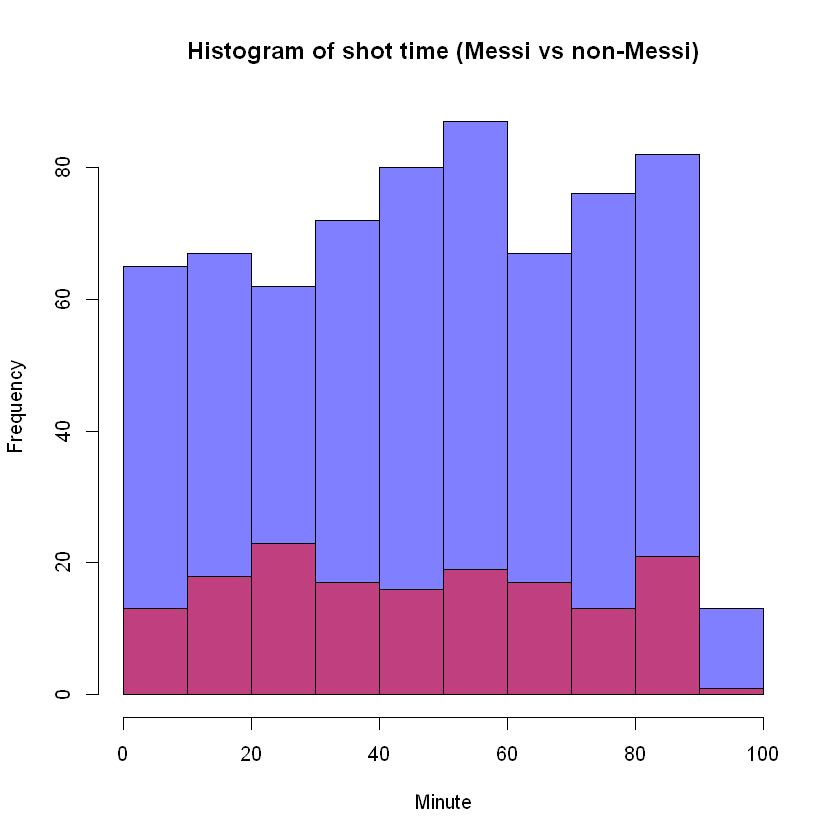

In [60]:
# layout(1:2)
hist(shots$minute[shots$player.name != 'Lionel Andrés Messi Cuccittini'],
    col = rgb(0,0,1,.5),
     main = "Histogram of shot time (Messi vs non-Messi)",
     xlab = "Minute"
    )
hist(shots$minute[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
     col = rgb(1,0,0,.5),
     add = TRUE)